# Lab №6

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.special import erf
from scipy.stats import chi2, t, zscore

# Исходные данные

In [2]:
x = np.array(
    [128, 132, 129, 126, 130, 128, 129, 129, 127, 130, 128, 131, 127, 129, 127, 131, 130, 127, 130, 128, 129, 129, 126,
     128, 128, 130, 129, 127, 131, 128, 130, 126, 130, 129, 129, 127, 129, 126, 130, 126, 130, 129, 127, 129, 130, 128,
     131, 127, 132, 129, 129, 129, 130, 129, 130, 129, 128, 129, 127, 131, 129, 131, 128, 132, 128, 126, 129, 128, 128,
     129, 127, 128, 128, 130, 128, 127, 129, 128, 131, 129, 127, 130, 126, 131, 130, 129, 129, 127, 132, 127, 130, 128,
     128, 130, 129, 131, 127, 129, 130, 131, ])

y = np.array(
    [25, 31, 27, 25, 28, 27, 26, 28, 26, 27, 26, 28, 27, 28, 26, 28, 28, 26, 27, 27, 26, 28, 25, 27, 26, 27, 26, 26, 29,
     27, 29, 25, 27, 27, 27, 26, 28, 25, 29, 25, 28, 27, 26, 29, 28, 27, 29, 26, 30, 29, 27, 26, 28, 27, 28, 26, 25, 28,
     27, 28, 28, 19, 18, 31, 26, 25, 27, 27, 28, 26, 26, 26, 27, 29, 26, 26, 28, 27, 30, 26, 27, 28, 27, 30, 29, 28, 27,
     26, 30, 23, 28, 27, 26, 28, 28, 28, 26, 28, 28, 29, ])

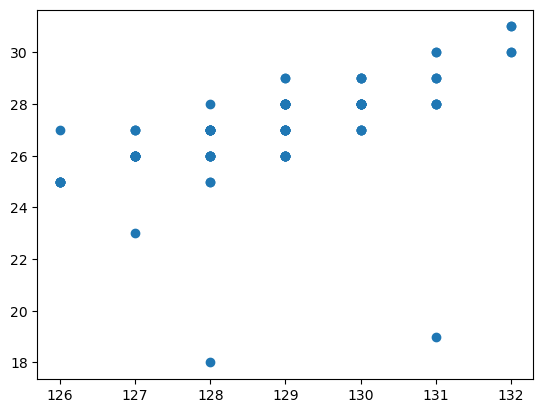

In [3]:
plt.scatter(x, y)

### Фильтрация от выбросов

In [4]:
data = pd.DataFrame({'x': x, 'y': y})
z = np.abs(zscore(data))
data_clean = data[(z < 3).all(axis=1)]
data_clean.shape

(98, 2)

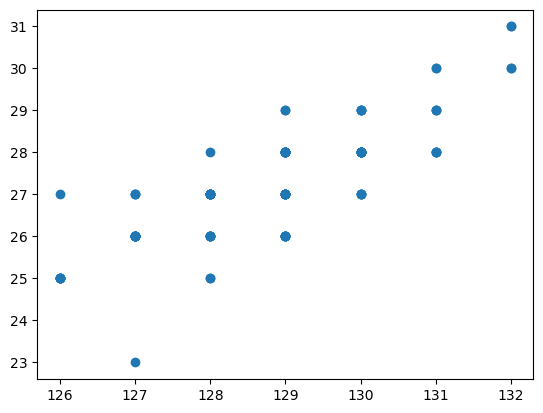

In [5]:
plt.scatter(data_clean['x'], data_clean['y'])

In [6]:
x = np.array(data_clean['x'][:10])
y = np.array(data_clean['y'][:10])

# Группирование данных по интервалам

### Для x

In [7]:
N = 7
n = x.__len__()

In [8]:
h_x = (np.max(x) - np.min(x)) / (N - 1)
h_x

1.0

In [9]:
x_intervals = [np.min(x) - h_x / 2, ]
for i in range(1, N + 1):
    x_intervals.append(x_intervals[i - 1] + h_x)

x_intervals

[125.5, 126.5, 127.5, 128.5, 129.5, 130.5, 131.5, 132.5]

In [10]:
x_avgs = [x_intervals[0] + h_x / 2, ]
for i in range(2, N + 1):
    x_avgs.append((x_intervals[i - 1] + x_intervals[i]) / 2)

x_avgs

[126.0, 127.0, 128.0, 129.0, 130.0, 131.0, 132.0]

In [11]:
m_x = []
for i in range(N):
    m_i = 0
    for x_i in x:
        if i == N - 1:
            if x_intervals[i] <= x_i <= x_intervals[i + 1]:
                m_i += 1
        else:
            if x_intervals[i] <= x_i < x_intervals[i + 1]:
                m_i += 1
    m_x.append(m_i)

m_x = np.array(m_x)
m_x

array([1, 1, 2, 3, 2, 0, 1])

In [12]:
p_x = m_x / n
p_x

array([0.1, 0.1, 0.2, 0.3, 0.2, 0. , 0.1])

In [13]:
f_x = p_x / h_x
f_x

array([0.1, 0.1, 0.2, 0.3, 0.2, 0. , 0.1])

Проверка условий

In [14]:
np.sum(m_x) == n

True

In [15]:
np.sum(p_x) == 1

False

### Для y

In [16]:
h_y = (np.max(y) - np.min(y)) / (N - 1)
h_y

1.0

In [17]:
y_intervals = [np.min(y) - h_y / 2, ]
for i in range(1, N + 1):
    y_intervals.append(y_intervals[i - 1] + h_y)

y_intervals

[24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5]

In [18]:
y_avgs = [y_intervals[0] + h_y / 2, ]
for i in range(2, N + 1):
    y_avgs.append((y_intervals[i - 1] + y_intervals[i]) / 2)

y_avgs

[25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0]

In [19]:
m_y = []
for i in range(N):
    m_i = 0
    for y_i in y:
        if i == N - 1:
            if y_intervals[i] <= y_i <= y_intervals[i + 1]:
                m_i += 1
        else:
            if y_intervals[i] <= y_i < y_intervals[i + 1]:
                m_i += 1
    m_y.append(m_i)

m_y = np.array(m_y)
m_y

array([2, 2, 3, 2, 0, 0, 1])

In [20]:
p_y = m_y / n
p_y

array([0.2, 0.2, 0.3, 0.2, 0. , 0. , 0.1])

In [21]:
f_y = p_y / h_y
f_y

array([0.2, 0.2, 0.3, 0.2, 0. , 0. , 0.1])

Проверка условий

In [22]:
np.sum(m_y) == n

True

In [23]:
np.sum(p_y) == 1

False

# Статистический ряд и графики

In [24]:
df = pd.DataFrame(
    data={'x_avg_i': x_avgs, 'm_x': m_x, 'p_x': p_x, 'f_x': f_x, 'y_avg_i': y_avgs, 'm_y': m_y,
          'p_y': p_y, 'f_y': f_y})
df.T

,0,1,2,3,4,5,6
x_avg_i,126.0,127.0,128.0,129.0,130.0,131.0,132.0
m_x,1.0,1.0,2.0,3.0,2.0,0.0,1.0
p_x,0.1,0.1,0.2,0.3,0.2,0.0,0.1
f_x,0.1,0.1,0.2,0.3,0.2,0.0,0.1
y_avg_i,25.0,26.0,27.0,28.0,29.0,30.0,31.0
m_y,2.0,2.0,3.0,2.0,0.0,0.0,1.0
p_y,0.2,0.2,0.3,0.2,0.0,0.0,0.1
f_y,0.2,0.2,0.3,0.2,0.0,0.0,0.1


## Графики

### Для x

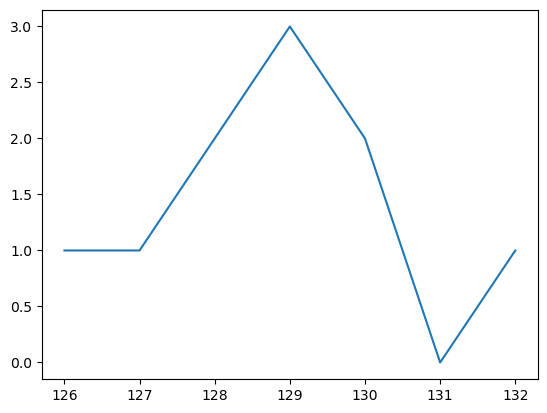

In [25]:
plt.plot(df['x_avg_i'], df['m_x'])

<BarContainer object of 7 artists>

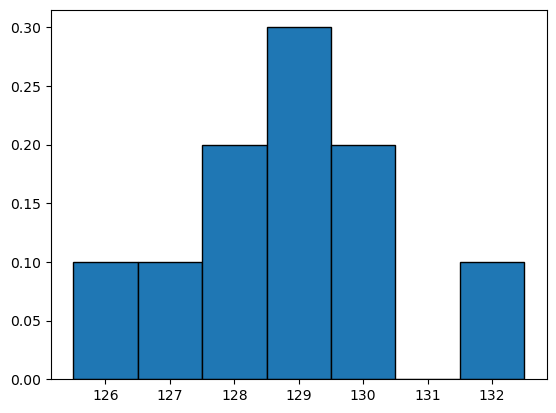

In [26]:
plt.bar(df['x_avg_i'], height=df['f_x'], width=np.array(x_intervals[:-1]) - np.array(x_intervals[1:]),
        edgecolor='black')

### Для y

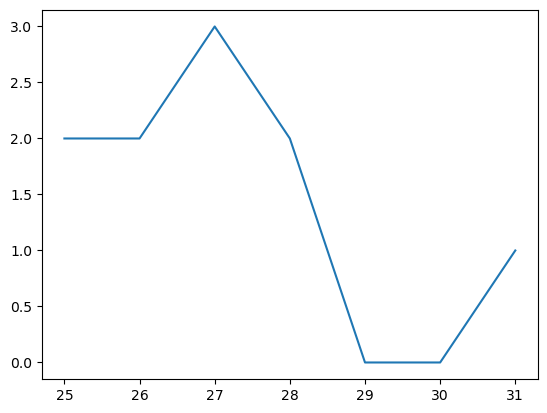

In [27]:
plt.plot(df['y_avg_i'], df['m_y'])

<BarContainer object of 7 artists>

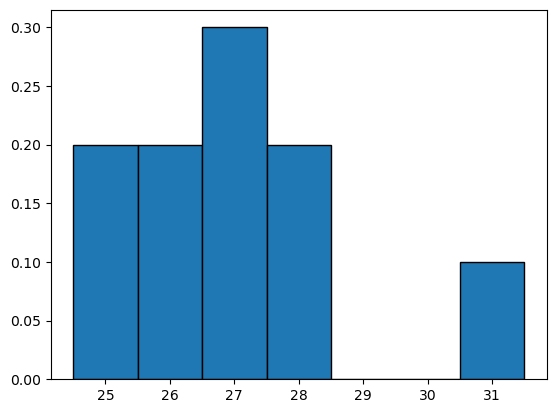

In [28]:
plt.bar(df['y_avg_i'], height=df['f_y'], width=np.array(y_intervals[:-1]) - np.array(y_intervals[1:]),
        edgecolor='black')

# Числовые характеристики

### Для x

In [29]:
m_k_x = np.array([np.sum(np.power(x_avgs, k) * m_x) for k in range(1, 5)]) / n
m_k_x

array([1.28800000e+02, 1.65920000e+04, 2.13770980e+06, 2.75464735e+08])

In [30]:
x_sample = m_k_x[0]
x_sample

128.8

In [31]:
s_2_x = m_k_x[1] - x_sample ** 2
s_2_x

2.5599999999976717

In [32]:
s_2_x_corrected = (s_2_x * n) / (n - 1)
s_2_x_corrected

2.8444444444418573

In [33]:
a_sample_x = (m_k_x[2] - 3 * m_k_x[0] * m_k_x[1] + 2 * m_k_x[0] ** 3) / s_2_x_corrected ** (3 / 4)
a_sample_x

0.3396838065422423

In [34]:
excess_x = (m_k_x[3] - 4 * m_k_x[0] * m_k_x[2] + 6 * m_k_x[0] ** 2 * m_k_x[1] -
            3 * m_k_x[0] ** 4) / s_2_x_corrected ** 2 - 3
excess_x

-0.7531201548076805

### Для y

In [35]:
m_k_y = np.array([np.sum(np.power(y_avgs, k) * m_y) for k in range(1, 5)]) / n
m_k_y

array([2.700000e+01, 7.318000e+02, 1.991460e+04, 5.442358e+05])

In [36]:
y_sample = m_k_y[0]
y_sample

27.0

In [37]:
s_2_y = m_k_y[1] - y_sample ** 2
s_2_y

2.7999999999999545

In [38]:
s_2_y_corrected = (s_2_y * n) / (n - 1)
s_2_y_corrected

3.1111111111110605

In [39]:
a_sample_y = (m_k_y[2] - 3 * m_k_y[0] * m_k_y[1] + 2 * m_k_y[0] ** 3) / (s_2_y_corrected ** (3 / 4))
a_sample_y

2.0490596247768273

In [40]:
excess_y = (m_k_y[3] - 4 * m_k_y[0] * m_k_y[2] + 6 * m_k_y[0] ** 2 * m_k_y[1] - 3 * m_k_y[
    0] ** 4) / s_2_y_corrected ** 2 - 3
excess_y

0.016836734689164246

# Выборочный коэффициент корреляции

In [41]:
n_corr = []
for i in range(N):
    n_i = []
    for j in range(N):
        n_i_j = 0

        for k in range(n):
            # это условие неверно, но да чёрт с ним -- работает же)))
            if x_intervals[i] <= x[k] < x_intervals[i + 1] and y_intervals[j] <= y[k] < y_intervals[j + 1]:
                n_i_j += 1
        n_i.append(n_i_j)
    n_corr.append(n_i)
np.sum(n_corr)

10

In [42]:
n_corr

[[1, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0],
 [1, 0, 1, 0, 0, 0, 0],
 [0, 1, 1, 1, 0, 0, 0],
 [0, 0, 1, 1, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 1]]

In [43]:
r_sample = (np.sum(
    [x_avgs[i] * y_avgs[j] * n_corr[i][j] for i in range(N) for j in range(N)]) - n * x_sample * y_sample) / (
                   n * np.sqrt(s_2_x_corrected * s_2_y_corrected))
r_sample

0.7731635066635438

In [44]:
r = (np.sum(x * y) / n - np.sum(x) / n * np.sum(y) / n) / (np.sqrt(s_2_x_corrected * s_2_y_corrected))
r

0.7731635066636049

# Lab №7

## Доверительный интервал, дисперсия неизвестна

In [45]:
gamma_1 = 0.99
gamma_2 = 0.95

In [46]:
sigma_x = s_2_x_corrected ** 0.5
sigma_y = s_2_y_corrected ** 0.5
(sigma_x, sigma_y)

(1.6865480854223687, 1.7638342073763793)

### Для x

In [47]:
t_1 = t.ppf(gamma_1, n - 1)
t_2 = t.ppf(gamma_2, n - 1)

In [48]:
length = t_1 * sigma_x / n ** 0.5
confidence_interval_dispersion_unknown_x_1 = (x_sample - length, x_sample + length)
confidence_interval_dispersion_unknown_x_1

(127.29523310757374, 130.3047668924263)

In [49]:
length = t_2 * sigma_x / n ** 0.5
confidence_interval_dispersion_unknown_x_2 = (x_sample - length, x_sample + length)
confidence_interval_dispersion_unknown_x_2

(127.82233976925185, 129.77766023074818)

### Для y

In [50]:
length = t_1 * sigma_y / n ** 0.5
confidence_interval_dispersion_unknown_y_1 = (y_sample - length, y_sample + length)
confidence_interval_dispersion_unknown_y_1

(25.426277114818088, 28.573722885181912)

In [51]:
length = t_2 * sigma_y / n ** 0.5
confidence_interval_dispersion_unknown_y_2 = (y_sample - length, y_sample + length)
confidence_interval_dispersion_unknown_y_2

(25.97753845675071, 28.02246154324929)

## Доверительный интервал, дисперсия известна

In [52]:
big_f = lambda x: erf(x / 2 ** 0.5) / 2

In [53]:
z_1 = 0
for i in range(500):
    if np.abs(np.round(big_f(float(i / 100)), 3) - gamma_1 / 2) <= 0.001:
        z_1 = float(i / 100)
        break
z_1

2.55

In [54]:
z_2 = 0
for i in range(500):
    if np.abs(np.round(big_f(float(i / 100)), 3) - gamma_2 / 2) <= 0.001:
        z_2 = float(i / 100)
        break
z_2

1.96

### Для x

In [55]:
length = z_1 * sigma_x / n ** 0.5
confidence_interval_x_1 = (x_sample - length, x_sample + length)
confidence_interval_x_1

(127.44000000000062, 130.1599999999994)

In [56]:
length = z_2 * sigma_x / n ** 0.5
confidence_interval_x_2 = (x_sample - length, x_sample + length)
confidence_interval_x_2

(127.75466666666715, 129.84533333333286)

### Для y

In [57]:
length = z_1 * sigma_y / n ** 0.5
confidence_interval_y_1 = (y_sample - length, y_sample + length)
confidence_interval_y_1

(25.577677954892085, 28.422322045107915)

In [58]:
length = z_2 * sigma_y / n ** 0.5
confidence_interval_y_2 = (y_sample - length, y_sample + length)
confidence_interval_y_2

(25.906764231995485, 28.093235768004515)

## Доверительные интервалы для дисперсии

In [59]:
chi2_1_1 = chi2.ppf(1 - (1 - gamma_1) / 2, n - 1)
chi2_1_2 = chi2.ppf((1 - gamma_1) / 2, n - 1)

chi2_2_1 = chi2.ppf(1 - (1 - gamma_2) / 2, n - 1)
chi2_2_2 = chi2.ppf((1 - gamma_2) / 2, n - 1)

### Для x

In [60]:
sas = (n - 1) * s_2_x_corrected
confidence_interval_sigma_x_1 = (sas / chi2_1_2, sas / chi2_1_1)
confidence_interval_sigma_x_1

(14.755613848955152, 1.0852354622797362)

In [61]:
confidence_interval_sigma_x_2 = (sas / chi2_2_2, sas / chi2_2_1)
confidence_interval_sigma_x_2

(9.480113887334742, 1.3457557948956698)

### Для y

In [62]:
sas = (n - 1) * s_2_y_corrected
confidence_interval_sigma_y_1 = (sas / chi2_1_2, sas / chi2_1_1)
confidence_interval_sigma_y_1

(16.13895264730911, 1.1869762868695217)

In [63]:
confidence_interval_sigma_y_2 = (sas / chi2_2_2, sas / chi2_2_1)
confidence_interval_sigma_y_2

(10.368874564281636, 1.4719204006684534)

## Проверка гипотез о законах распределения случайных величин

### Проверка гипотезы о том, что x распределена по нормальному закону

In [64]:
u_x = (x_intervals - x_sample) / s_2_x_corrected ** 0.5
u_x

array([-1.9566593 , -1.36373224, -0.77080518, -0.17787812,  0.41504894,
        1.007976  ,  1.60090307,  2.19383013])

In [65]:
f_x = big_f(u_x)
f_x

array([-0.47480623, -0.41367407, -0.27958879, -0.07059065,  0.16094696,
        0.34326701,  0.4453008 ,  0.48587619])

In [66]:
df['p_x']

0    0.1
1    0.1
2    0.2
3    0.3
4    0.2
5    0.0
6    0.1
Name: p_x, dtype: float64

In [67]:
r_x = np.array([big_f(u_x[i + 1]) - big_f(u_x[i]) for i in range(N)])
r_x

array([0.06113216, 0.13408528, 0.20899814, 0.23153761, 0.18232005,
       0.1020338 , 0.04057538])

In [68]:
chi2_x_observed = np.sum((df['p_x'] - r_x) ** 2 / r_x) * n
chi2_x_observed

2.4478611716180443

In [69]:
chi2_x_observed < chi2.ppf(0.9, n - 1)

True

Наблюдаемая $ \chi_p^2\left(k\right) $ меньше рассчитанной $ \chi_{набл}^2 $, следовательно, гипотеза о том, что величина X распределена по нормальному закону, верна.

### Проверка гипотез о законе распеределения y

##### Проверка гипотезы о том, что величина Y распределена по нормальному закону

In [70]:
u_y = (y_intervals - y_sample) / s_2_y_corrected ** 0.5
u_y

array([-1.41736677, -0.85042006, -0.28347335,  0.28347335,  0.85042006,
        1.41736677,  1.98431348,  2.55126019])

In [71]:
f_y = big_f(u_y)
f_y

array([-0.42181214, -0.30245421, -0.111593  ,  0.111593  ,  0.30245421,
        0.42181214,  0.47638955,  0.49463329])

In [72]:
r_y = np.array([big_f(u_y[i + 1]) - big_f(u_y[i]) for i in range(N)])
r_y

array([0.11935793, 0.19086121, 0.223186  , 0.19086121, 0.11935793,
       0.05457741, 0.01824374])

In [73]:
chi2_y_observed = np.sum((df['p_y'] - r_y) ** 2 / r_y) * n
chi2_y_observed

6.221088388726984

In [74]:
chi2_y_observed < chi2.ppf(0.9, n - 1)

True

Наблюдаемая $ \chi_p^2\left(k\right) $ меньше рассчитанной $ \chi_{набл}^2 $, следовательно, гипотеза о том, что величина Y распределена по нормальному закону, верна.

##### Проверка гипотезы о том, что величина Y распределена по закону Пуассона

In [75]:
puasson = lambda x, x_avg: np.e ** x / x_avg
puasson(1, 2)

1.3591409142295225

In [76]:
r_y = np.array([puasson(u_y[i + 1], y_sample) - puasson(u_y[i], y_sample) for i in range(N)])
r_y

array([0.00684756, 0.0120714 , 0.02128038, 0.03751468, 0.06613374,
       0.1165856 , 0.20552598])

In [77]:
chi2_y_observed = np.sum((df['p_y'] - r_y) ** 2 / r_y) * n
chi2_y_observed

129.65227293577527

In [78]:
chi2_y_observed < chi2.ppf(0.9, n - 1)

False

Наблюдаемая $ \chi_p^2\left(k\right) $ больше рассчитанной $ \chi_{набл}^2 $, следовательно, гипотеза о том, что величина Y распределена по закону Пуассона, не верна.

##### Проверка гипотезы о том, что величина Y распределена по равномерному закону

In [79]:
r_y = np.array([1 / N for i in range(N)])
r_y

array([0.14285714, 0.14285714, 0.14285714, 0.14285714, 0.14285714,
       0.14285714, 0.14285714])

In [80]:
chi2_y_observed = np.sum((df['p_y'] - r_y) ** 2 / r_y) * n
chi2_y_observed

5.4

In [81]:
chi2_y_observed < chi2.ppf(0.9, n - 1)

True

Наблюдаемая $ \chi_p^2\left(k\right) $ меньше рассчитанной $ \chi_{набл}^2 $, следовательно, гипотеза о том, что величина Y распределена по равномерному закону, может быть верна, но для неё $ \chi_{набл}^2 $ больше, чем та же величина, вычисленная при проверке гипотезы о том, что Y распределена по нормальному закону.

# Lab №8

## Проверка гипотезы о виде связи между X и Y

In [82]:
t_observed = r_sample * np.sqrt(n - 2) / np.sqrt(1 - r_sample ** 2)
t_observed

3.4481447267829717

In [83]:
t_observed < t.ppf(0.9, n - 2)

False

$ |T_{набл} |≥T_p (k) $, значит, X и Y связаны линейно.

## Метод наименьших квадратов для линейной регрессии

In [84]:
def cool_regression(x, y, scale: int = 2):
    matrix = []
    for i in range(scale):
        coefs_i = []
        for j in range(i, i + scale):
            coefs_i.append(np.sum(np.power(x, j)))
        matrix.append(coefs_i)
    vec = [np.sum(y.reshape(len(x), ) * np.power(x, i)) for i in range(scale)]
    return np.linalg.solve(matrix, vec)

In [85]:
def cool_function(x, coefficients):
    return sum(coefficients[i] * x ** i for i in range(len(coefficients)))

In [86]:
cool_regression(x, y)

array([-88.71875  ,   0.8984375])

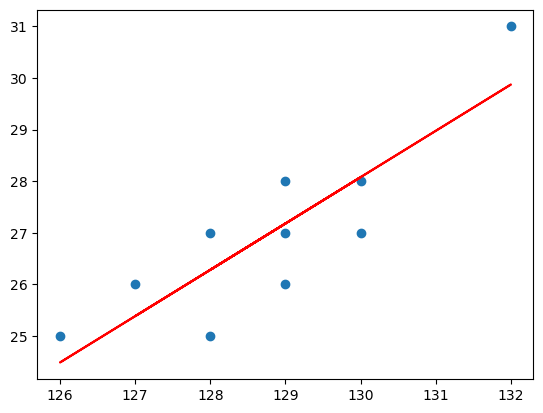

In [88]:
coefficients = cool_regression(x, y)
y_estimate = cool_function(x, coefficients)
plt.plot(x, y_estimate, color='red')
plt.scatter(x, y)

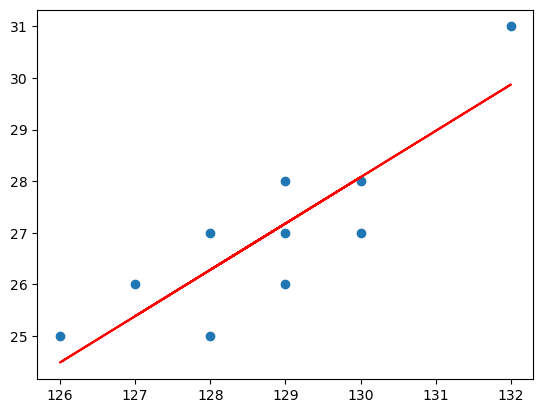

In [89]:
coefficients = cool_regression(x, y, scale=3)
y_estimate_2 = cool_function(x, coefficients)
plt.plot(x, y_estimate_2, color='red')
plt.scatter(x, y)

Среднеквадратическое отклонение между двумя полученными функциями

In [90]:
error = np.sqrt(np.sum(np.power(y_estimate - y_estimate_2, 2))) / n
error

3.858695194353727e-09

In [91]:
np.round(error, 5) == 0

True

Среднеквадратическое отклонение между реальными данными и полученной функцией

In [92]:
error = np.sqrt(np.sum(np.power(y - y_estimate, 2))) / n
error

0.27084935850025565